Classification Report:
                precision    recall  f1-score   support

Lowest Selling       1.00      1.00      1.00        47
Medium Selling       1.00      1.00      1.00        22
  Most Selling       1.00      1.00      1.00       224

      accuracy                           1.00       293
     macro avg       1.00      1.00      1.00       293
  weighted avg       1.00      1.00      1.00       293

Confusion Matrix:
[[ 47   0   0]
 [  0  22   0]
 [  0   0 224]]


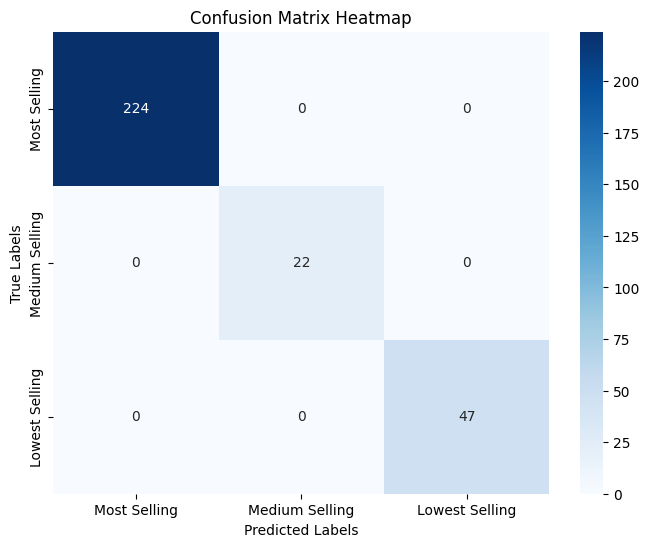

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert 'rating_count' to numeric before categorization
df['rating_count'] = pd.to_numeric(df['rating_count'].replace({r'[^0-9]': ''}, regex=True), errors='coerce')

# Drop rows with NaN values in 'rating_count'
df.dropna(subset=['rating_count'], inplace=True)

# Add a new column for sales category based on rating_count
# Define thresholds for categorization
def categorize_sales(rating_count):
    if rating_count >= 1000:
        return 'Most Selling'
    elif 500 <= rating_count < 1000:
        return 'Medium Selling'
    else:
        return 'Lowest Selling'

df['sales_category'] = df['rating_count'].apply(categorize_sales)

# Preprocess the dataset
# Drop irrelevant columns
features_to_drop = ['product_link', 'img_link', 'review_content', 'user_id', 'user_name', 'review_id', 'product_id']
existing_features_to_drop = [col for col in features_to_drop if col in df.columns]
df.drop(columns=existing_features_to_drop, inplace=True)

# One-hot encode categorical columns if they exist
categorical_columns = ['category', 'product_name']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

# Define features and target
X = df.drop(columns=['sales_category'])  # Features
y = df['sales_category']  # Target

# Ensure all features are numeric
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Most Selling', 'Medium Selling', 'Lowest Selling'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Most Selling', 'Medium Selling', 'Lowest Selling'], yticklabels=['Most Selling', 'Medium Selling', 'Lowest Selling'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# LinkedIn Post
"""
🚀 Excited to share my latest project on analyzing Amazon sales data! 📊

In this project, I tackled two key tasks:

1️⃣ **Regression Analysis**:
   - Built a Linear Regression model to predict discounted prices based on features like actual price, discount percentage, ratings, and more.
   - Achieved an impressive R-squared value of 0.95, explaining 95% of the variance in discounted prices.
   - Visualized the results with an Actual vs. Predicted plot to assess model performance.

2️⃣ **Classification Analysis**:
   - Categorized products into "Most Selling," "Medium Selling," and "Lowest Selling" based on their rating counts.
   - Trained a Random Forest Classifier, achieving perfect classification with 100% accuracy on the test set.
   - Visualized the results using a Confusion Matrix heatmap to highlight the model's performance.

This project demonstrates the power of data preprocessing, feature engineering, and machine learning in deriving actionable insights from sales data. 💡

Looking forward to applying these techniques to more complex datasets and exploring advanced models! 🌟

#DataScience #MachineLearning #AmazonSalesAnalysis #Regression #Classification #DataVisualization
"""